In [1]:
# Neural Network with fully connected layers with using nn.Linear
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root = 'data/', train = True, download = True)

In [3]:
test_dataset = MNIST(root = 'data/', train = False)

In [10]:
# Converting data into tensor
import torchvision.transforms as transforms
dataset = MNIST(root = 'data/', train = True, download = True, transform = transforms.ToTensor() )

AttributeError: 'MNIST' object has no attribute 'shape'

In [5]:
# Splitting the data into training and validation sets
from torch.utils.data import random_split
train_data, val_data = random_split(dataset, [50000, 10000])

In [9]:
print(len(train_data))

50000


In [11]:
# Converting data into batches for training and validation
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_data,batch_size, shuffle = True)
# Shuffle set to true to get different batch of data every epoch
val_loader = DataLoader(val_data, batch_size)

for image,label in train_loader:
    print(image.shape)
    print(label.shape)
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [173]:
import torch.nn.functional
loss_fn = torch.nn.functional.cross_entropy

In [12]:
def accuracy(pred, labels):
    _, pred = torch.max(pred).item()
    acc = torch.sum(pred == labels).item()/ len(pred)
    return acc

In [13]:
linear1 = torch.nn.Linear(784, 32)
linear2 = torch.nn.Linear(32, 10)
parameters = [linear1.weight, linear1.bias , linear2. weight, linear2.bias]


In [187]:
def fit(epochs, lr):
    
    opt = torch.optim.SGD(parameters, lr)
    dl = []
    da = []

    for epoch in range(epochs):

        l = []
        a = []

        for image, labels in train_loader:
            # Prediction in first layer
            out = linear1(image.reshape(-1,784))
            # Applying activation function
            out = torch.nn.functional.relu(out)
            # Prediction in last layer
            pred = linear2(out)
            # loss calculation
            loss = loss_fn(pred, labels)
            # Gradient calculation
            loss.backward()
            # Weight adjusting
            opt.step()
            # Setting gradient to zero
            opt.zero_grad()
            

        for image, labels in val_loader:
             # Prediction in first layer
            out = linear1(image.reshape(-1,784))
            # Applying activation function
            out = torch.nn.functional.relu(out)
            # Prediction in last layer
            pred = linear2(out)
            # loss calculation
            loss = loss_fn(pred, labels)
            # accuracy calulation
            _, pred = torch.max(pred, dim = 1)
            acc = (torch.sum(pred == labels).item()/len(pred))

            l.append(loss)
            a.append(acc)


        dl.append(sum(l)/len(l))
        da.append(sum(a)/len(a))

#         print('Epoch loss : ', torch.stack(l).mean())
#         print('Epoch accu : ', torch.stack(a).mean())
#         print(dl)
        print('Accuracy of epoch {}, is {}'.format((epoch + 1),  sum(a)/len(a)))
        print('Loss of epoch {}, is {}'.format((epoch + 1), sum(l)/len(l) ))
    return da,dl

In [188]:
da,dl = fit(30, 0.05)


Accuracy of epoch 1, is 0.8872626582278481
Loss of epoch 1, is 0.43078187108039856
Accuracy of epoch 2, is 0.9026898734177216
Loss of epoch 2, is 0.3467545807361603
Accuracy of epoch 3, is 0.9085245253164557
Loss of epoch 3, is 0.3208477795124054
Accuracy of epoch 4, is 0.915743670886076
Loss of epoch 4, is 0.30140796303749084
Accuracy of epoch 5, is 0.9153481012658228
Loss of epoch 5, is 0.28620466589927673
Accuracy of epoch 6, is 0.9206882911392406
Loss of epoch 6, is 0.2711000442504883
Accuracy of epoch 7, is 0.9245450949367089
Loss of epoch 7, is 0.2664300799369812
Accuracy of epoch 8, is 0.9279074367088608
Loss of epoch 8, is 0.2486804723739624
Accuracy of epoch 9, is 0.9312697784810127
Loss of epoch 9, is 0.2394905984401703
Accuracy of epoch 10, is 0.9345332278481012
Loss of epoch 10, is 0.22972239553928375
Accuracy of epoch 11, is 0.9343354430379747
Loss of epoch 11, is 0.2231627106666565
Accuracy of epoch 12, is 0.9379944620253164
Loss of epoch 12, is 0.2153654396533966
Accurac

In [189]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())
len(test_dataset)
j=0
for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    out = linear1(image.reshape(-1,784))
    # Applying activation function
    out = torch.nn.functional.relu(out)
    # Prediction in last layer
    pred = linear2(out)
    _, pred = torch.max(pred, dim = 1)
#     print(pred)
#     print(label)
    if pred == label:
        j+=1
print('Test dataset accauracy :', j/len(test_dataset))
            
            

Test dataset accauracy : 0.9574


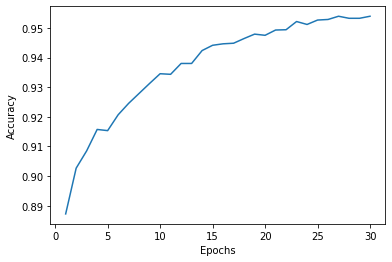

In [190]:
import matplotlib.pyplot
matplotlib.pyplot.plot([(i+1) for i in  range(len(da))], da)
matplotlib.pyplot.xlabel('Epochs')
matplotlib.pyplot.ylabel('Accuracy')
matplotlib.pyplot.show()